# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None

# **Data Acquisition**
This part is to acquire by focusing on scraping and collecting customer feedback and reviewing data from a third-party source.

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 4
page_size = 973

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 973 total reviews
Scraping page 2
   ---> 1946 total reviews
Scraping page 3
   ---> 2919 total reviews
Scraping page 4
   ---> 3892 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The check in process and rew...
1,"✅ Trip Verified | We flew in November 2023, ..."
2,✅ Trip Verified | I left for London from Johan...
3,✅ Trip Verified | After an excellent flight ...
4,✅ Trip Verified | On a recent flight from Cy...


In [ ]:
df.isnull().sum()

,0
reviews,0


In [ ]:
df

,reviews
0,✅ Trip Verified | The check in process and rew...
1,"✅ Trip Verified | We flew in November 2023, ..."
2,✅ Trip Verified | I left for London from Johan...
3,✅ Trip Verified | After an excellent flight ...
4,✅ Trip Verified | On a recent flight from Cy...
...,...
3887,Chicago O'Hare to London Heathrow on 2 May. ch...
3888,Travelled to HKG on board the new A380. Boardi...
3889,BA 059 London to Cape Town April 29 2014 econo...
3890,Las Vegas-LGW 777 3 class. Business. The uniqu...


# **Removing the parts before | in the reviews column**

In [ ]:
df.reviews= df.reviews.str.split('|').str[-1]

In [ ]:
Sentiment_Analysis = df

In [ ]:
Sentiment_Analysis.tail()

,reviews
3887,Chicago O'Hare to London Heathrow on 2 May. ch...
3888,Travelled to HKG on board the new A380. Boardi...
3889,BA 059 London to Cape Town April 29 2014 econo...
3890,Las Vegas-LGW 777 3 class. Business. The uniqu...
3891,An interesting contrast on recent Gatwick to T...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# **Data Preparation**

Require Data Cleaning and Data Transformation.


# **Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

# **Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Step 1: Cleaning the text**

Now since I have extracted data from the website, it is not cleaned and ready to be analyzed yet.
The reviews section will need to be cleaned for punctuations, spellings and other characters.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

# **Step 2: Tokenization**
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

In [ ]:
# Define a function to clean the text
def clean(text, remove_stopwords = True):
# Replace contractions with their longer forms
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)

    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

# Cleaning the text in the review column
Sentiment_Analysis['Cleaned Reviews'] = Sentiment_Analysis['reviews'].apply(clean)
Sentiment_Analysis.head()

,reviews,Cleaned Reviews
0,The check in process and reward/loyalty progr...,The check process reward/loyalty program mess....
1,"We flew in November 2023, but it took this ...","We flew November 2023, took long seek satisfac..."
2,I left for London from Johannesburg at 21:15 ...,I left London Johannesburg 21:15 22 December 2...
3,After an excellent flight on a 777 CPT to L...,After excellent flight 777 CPT LHR return good...
4,On a recent flight from Cyprus BA621 on 23/...,"On recent flight Cyprus BA621 23/11/24, second..."


# **Step 3: Enrichment – POS tagging with Stopwords removal**

  Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

  Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.



In [ ]:
# The nltk.corpus package defines a collection of corpus reader classes.
# Which can be used to access the contents of a diverse set of corpora.
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')


# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Sentiment_Analysis['POS_tagged'] = Sentiment_Analysis['Cleaned Reviews'].apply(token_stop_pos)
Sentiment_Analysis.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,reviews,Cleaned Reviews,POS_tagged
0,The check in process and reward/loyalty progr...,The check process reward/loyalty program mess....,"[(check, n), (process, n), (reward/loyalty, n)..."
1,"We flew in November 2023, but it took this ...","We flew November 2023, took long seek satisfac...","[(flew, v), (November, n), (2023, None), (,, N..."
2,I left for London from Johannesburg at 21:15 ...,I left London Johannesburg 21:15 22 December 2...,"[(left, v), (London, n), (Johannesburg, n), (2..."
3,After an excellent flight on a 777 CPT to L...,After excellent flight 777 CPT LHR return good...,"[(excellent, a), (flight, n), (777, None), (CP..."
4,On a recent flight from Cyprus BA621 on 23/...,"On recent flight Cyprus BA621 23/11/24, second...","[(recent, a), (flight, n), (Cyprus, n), (BA621..."


# **Step 4: Obtaining the stem words**

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

Sentiment_Analysis['Lemma'] = Sentiment_Analysis['POS_tagged'].apply(lemmatize)
Sentiment_Analysis.head()

,reviews,Cleaned Reviews,POS_tagged,Lemma
0,The check in process and reward/loyalty progr...,The check process reward/loyalty program mess....,"[(check, n), (process, n), (reward/loyalty, n)...",check process reward/loyalty program mess . ...
1,"We flew in November 2023, but it took this ...","We flew November 2023, took long seek satisfac...","[(flew, v), (November, n), (2023, None), (,, N...","fly November 2023 , take long seek satisfact..."
2,I left for London from Johannesburg at 21:15 ...,I left London Johannesburg 21:15 22 December 2...,"[(left, v), (London, n), (Johannesburg, n), (2...",leave London Johannesburg 21:15 22 December ...
3,After an excellent flight on a 777 CPT to L...,After excellent flight 777 CPT LHR return good...,"[(excellent, a), (flight, n), (777, None), (CP...",excellent flight 777 CPT LHR return good . B...
4,On a recent flight from Cyprus BA621 on 23/...,"On recent flight Cyprus BA621 23/11/24, second...","[(recent, a), (flight, n), (Cyprus, n), (BA621...","recent flight Cyprus BA621 23/11/24 , second..."


In [ ]:
Sentiment_Analysis[['reviews','Lemma']]

,reviews,Lemma
0,The check in process and reward/loyalty progr...,check process reward/loyalty program mess . ...
1,"We flew in November 2023, but it took this ...","fly November 2023 , take long seek satisfact..."
2,I left for London from Johannesburg at 21:15 ...,leave London Johannesburg 21:15 22 December ...
3,After an excellent flight on a 777 CPT to L...,excellent flight 777 CPT LHR return good . B...
4,On a recent flight from Cyprus BA621 on 23/...,"recent flight Cyprus BA621 23/11/24 , second..."
...,...,...
3887,Chicago O'Hare to London Heathrow on 2 May. ch...,Chicago O'Hare London Heathrow 2 May . check...
3888,Travelled to HKG on board the new A380. Boardi...,Travelled HKG board new A380 . Boarding effi...
3889,BA 059 London to Cape Town April 29 2014 econo...,BA 059 London Cape Town April 29 2014 econom...
3890,Las Vegas-LGW 777 3 class. Business. The uniqu...,Las Vegas-LGW 777 3 class . Business . uniqu...


In [ ]:
Sentiment = Sentiment_Analysis

# **Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS_tagged,Lemma,Sentiment,Analysis
0,The check in process and reward/loyalty progr...,The check process reward/loyalty program mess....,"[(check, n), (process, n), (reward/loyalty, n)...",check process reward/loyalty program mess . ...,-0.7003,Negative
1,"We flew in November 2023, but it took this ...","We flew November 2023, took long seek satisfac...","[(flew, v), (November, n), (2023, None), (,, N...","fly November 2023 , take long seek satisfact...",-0.0237,Negative
2,I left for London from Johannesburg at 21:15 ...,I left London Johannesburg 21:15 22 December 2...,"[(left, v), (London, n), (Johannesburg, n), (2...",leave London Johannesburg 21:15 22 December ...,-0.9575,Negative
3,After an excellent flight on a 777 CPT to L...,After excellent flight 777 CPT LHR return good...,"[(excellent, a), (flight, n), (777, None), (CP...",excellent flight 777 CPT LHR return good . B...,0.9880,Positive
4,On a recent flight from Cyprus BA621 on 23/...,"On recent flight Cyprus BA621 23/11/24, second...","[(recent, a), (flight, n), (Cyprus, n), (BA621...","recent flight Cyprus BA621 23/11/24 , second...",-0.7783,Negative



#Sentiment_Analysis['POS_tagged_Reviews'] = Sentiment_Analysis['reviews'].apply(token_stop_pos)
#Sentiment_Analysis['Lemma_Reviews'] = Sentiment_Analysis['POS_tagged_Reviews'].apply(lemmatize)
vader_reviews_counts = Sentiment_Analysis['Analysis_Vader_Reviews'].value_counts()
vader_reviews_counts
vader_clean_reviews_counts = Sentiment_Analysis['Analysis_Vader_Cleaned_Reviews'].value_counts()
vader_clean_reviews_counts
vader_lemma_reviews_counts = Sentiment_Analysis['Analysis_Vader_Lemma_Reviews'].value_counts()
vader_lemma_reviews_counts

In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,2244
Negative,1238
Neutral,410


# **Visual Representation**

([<matplotlib.patches.Wedge at 0x7b4f37334e50>,
 [Text(-0.26205328997437977, 1.0683295714402012, 'Positive'),
  Text(-0.09931087704916136, -1.0955078044905597, 'Negative'),
  Text(1.2767414181409553, -0.43866997982928163, 'Neutral')],
 [Text(-0.1429381581678435, 0.5827252207855642, '57.7%'),
  Text(-0.05416956929954255, -0.5975497115403052, '31.8%'),
  Text(0.8038742262368977, -0.27619961692954764, '10.5%')])

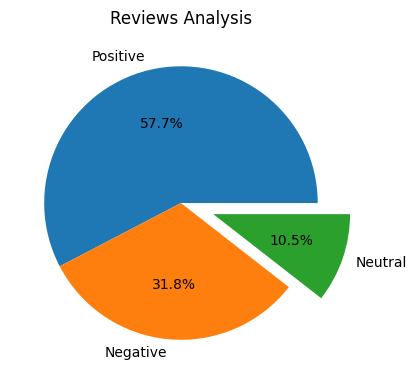

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
import os
cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

# **Wordcloud**
Wordcloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

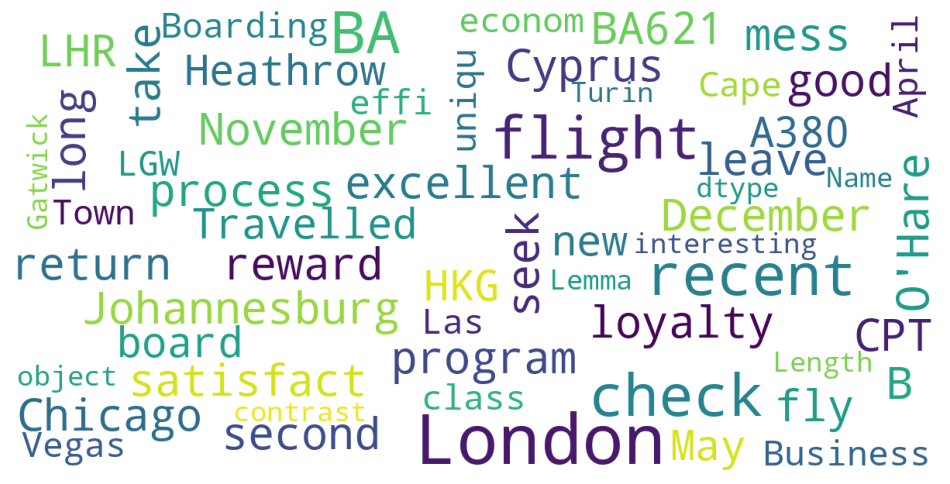

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)